**Описание проекта**:
Аналитика крупного интернет-магазина. 
Приоритизируем гипотезы, запустим A/B-тест и проанализируем результаты.

**Часть 1. Приоритизация гипотез.**

**Часть 2. Анализ A/B-теста**



In [5]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
from collections import defaultdict
import scipy.stats as stats
import plotly.graph_objs as go
from subprocess import Popen, PIPE
pd.set_option('max_colwidth', 400)
data = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')
data.info()
data.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [6]:
orders.info()
orders.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


In [7]:
visitors.info()
visitors.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


**Взгляд на данные** :
Нужно изменить формат даты в стобце date, проверить на наличие дубликатов.
Датасет по обьему данных не большой. Типы данных соответствуют действительности.
Есть два столбца group которые очевидно нужно будет обьеденить.

**Часть 1. Приоритизация гипотез.**


In [8]:
#Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.
data['ICE'] = (data['Impact'] * data['Confidence']) / data['Efforts']
print(data[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

                                                                                                     Hypothesis  \
8                                                       Запустить акцию, дающую скидку на товар в день рождения   
0            Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
7              Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
6          Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
1                                     Запустить собственную службу доставки, что сократит срок доставки заказов   
5                      Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов   
3           Изменить структура категорий, что увеличит конверсию, т.к. пользоват

In [9]:
#Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.
data['RICE'] = (data['Reach'] * data['Impact'] * data['Confidence']) / data[
    'Efforts'
]
data[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


**Вывод**: В случае ICE наиболее перспективные гипотезы 8,0,7.
В случае RICE наиболее перспективные гипотезы 7,2,0,6.
Гипотеза под номер 7 вышла на первое место так получилось из за того что rich равен 10 в то время как у других гипотез он меньше.


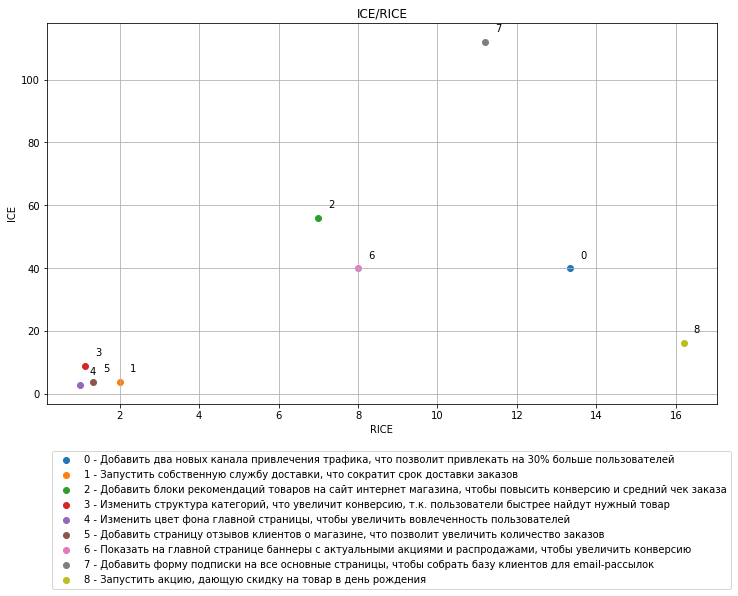

In [10]:
# Код ревьюера:
fig, ax = plt.subplots(figsize=(12, 7))

ax.set_xlabel('RICE')
ax.set_ylabel('ICE')
ax.set_title('ICE/RICE')

for i, txt in enumerate(data.index.values):
    legend = (str(txt) + ' - ' + str(data['Hypothesis'][i]))    
    ax.annotate(txt, (data['ICE'][i], data['RICE'][i]), xytext=(10,10), textcoords='offset points')
    plt.scatter(data['ICE'][i], data['RICE'][i], label = legend)
    
plt.grid(True)  
plt.legend(loc="lower left",  bbox_to_anchor=(0, -0.5))

plt.show()

**Часть 2. Анализ A/B-теста**
Мы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.
Теперь займемся их анализом.

In [11]:
#Построим график кумулятивной выручки по группам
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
orders.head(5)
visitors.head(5)



,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [12]:
# создаем массив уникальных пар значений дат и групп теста и удалим дубликаты если они есть
datesGroups = orders[['date','group','visitorId']].drop_duplicates()

In [13]:
#Проверим нет ли пользователей, которые оказались в обеих группах одновременно
group_sizes = orders.groupby(['visitorId', 'group']).size().reset_index()
group_sizes.columns = ['visitorId', 'group', 'count']
group_sizes = group_sizes.query('count > 1').sort_values(by='visitorId')
group_sizes

,visitorId,group,count
45,199603092,A,4
58,237748145,A,4
63,249864742,B,3
94,366673373,A,2
104,393266494,B,2
...,...,...,...
1045,4109358064,A,2
1050,4134830387,B,2
1065,4186807279,B,2
1079,4256040402,A,7


In [14]:
potentially_broken_users_list = list(zip(group_sizes['visitorId'], group_sizes['group']))
potentially_broken_users_dict = defaultdict(list)
for user, group in potentially_broken_users_list:
    potentially_broken_users_dict[user].append(group)

inappropriate_users = [user for user in potentially_broken_users_dict if len(potentially_broken_users_dict[user]) > 1]
inappropriate_orders = orders.query('visitorId in @inappropriate_users')
inappropriate_orders_grouped = (inappropriate_orders
                        .groupby(['visitorId', 'group', 'date'])
                        .agg({'transactionId': 'nunique', 'revenue': 'sum'})
                   )
inappropriate_orders_grouped

transactionId  revenue
visitorId  group date                              
1230306981 A     2019-08-09              3    18440
           B     2019-08-09              2    12840
2038680547 A     2019-08-04              2     4070
                 2019-08-17              1     3470
                 2019-08-22              1      760
                 2019-08-25              1      270
           B     2019-08-04              1     2800
                 2019-08-15              1     1680
                 2019-08-29              1     2420
2378935119 A     2019-08-10              1    58220
                 2019-08-15              1     1650
                 2019-08-17              1      310
                 2019-08-22              1     3390
           B     2019-08-09              1    30649
                 2019-08-10              1     2640
                 2019-08-25              1    21220
                 2019-08-28              2    24860
2458001652 A     2019-08-04              1      340
                 2019-08-06              1     1620
                 2019-08-07              1    17379
                 2019-08-11              1     8280
                 2019-08-22              1     5190
           B     2019-08-05              1     2420
                 2019-08-06              2    14030
                 2019-08-08              1     5227
                 2019-08-09              1     5227
                 2019-08-25              1     2385
4256040402 A     2019-08-01              1     5800
                 2019-08-12              1       50
                 2019-08-17              1     1550
                 2019-08-20              1    17650
                 2019-08-23              1    16950
                 2019-08-27              1     1630
                 2019-08-31              1     5170
           B     2019-08-08              1    58220
                 2019-08-16              1    56650
                 2019-08-18              1    10970
                 2019-08-31              1     1850

Пять пользователей оказались в двух группах одновременно, они совершили достаточно много транзакций и принесли значимую суму выручки, поэтому нужно очистить наши таблицы от этих пользователей, для корретного А/В теста

In [15]:
orders_filt = orders.query('visitorId not in @inappropriate_orders')

In [16]:
orders.groupby('visitorId').agg({'group' : 'nunique'}).reset_index().query('group > 1')

,visitorId,group
2,8300375,2
44,199603092,2
51,232979603,2
55,237748145,2
66,276558944,2
84,351125977,2
97,393266494,2
114,457167155,2
119,471551937,2
122,477780734,2


In [17]:
#Теперь отфильтруем таблицу visitors
inappropriate_orders_grouped = inappropriate_orders_grouped.reset_index()
inappropriate_orders_grouped['count'] = -1
inappropriate_orders_grouped = inappropriate_orders_grouped[['group', 'date', 'count']]
visitors_filt = visitors.merge(inappropriate_orders_grouped, on=['date', 'group'], how='left').fillna(0)
visitors_filt['visitors_'] = visitors_filt['visitors'] + visitors_filt['count']
visitors_filt = visitors_filt.drop(['visitors', 'count'], axis=1)
visitors_filt.columns = ['date', 'group', 'visitors']
visitors_filt['visitors'] = visitors_filt['visitors'].astype(int)

In [18]:
# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(
        lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group']
                                       )]
                                     .agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}),
                                     axis=1).sort_values(by=['date','group'])

In [19]:
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])


In [20]:
cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

In [21]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning:

Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()



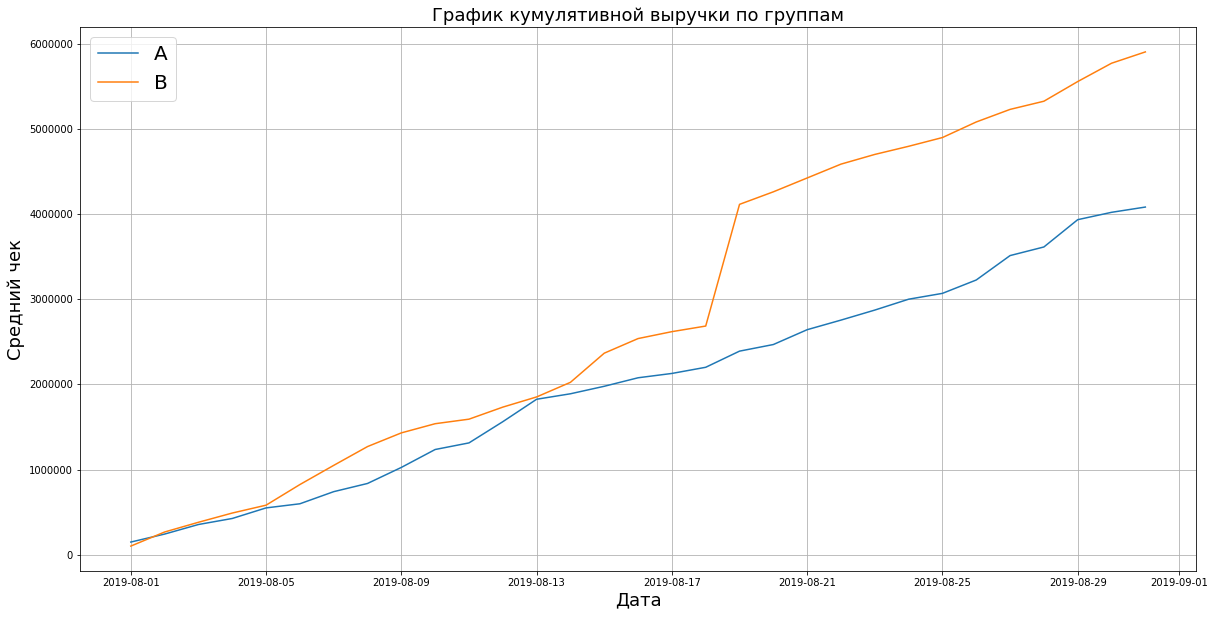

In [22]:
plt.figure(figsize=(20, 10))
plt.title('График кумулятивной выручки по группам', fontsize=18)
plt.xlabel("Дата",fontsize=18)
plt.ylabel("Средний чек",fontsize=18)
  
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend(('A', 'B'),fontsize=20)
plt.grid()
plt.show()

По графику можно сказать что сегмент B  вырвался вперед и продолжил лидировать весь остаток теста. Похоже что аномально большие заказы влияют на результаты теста.

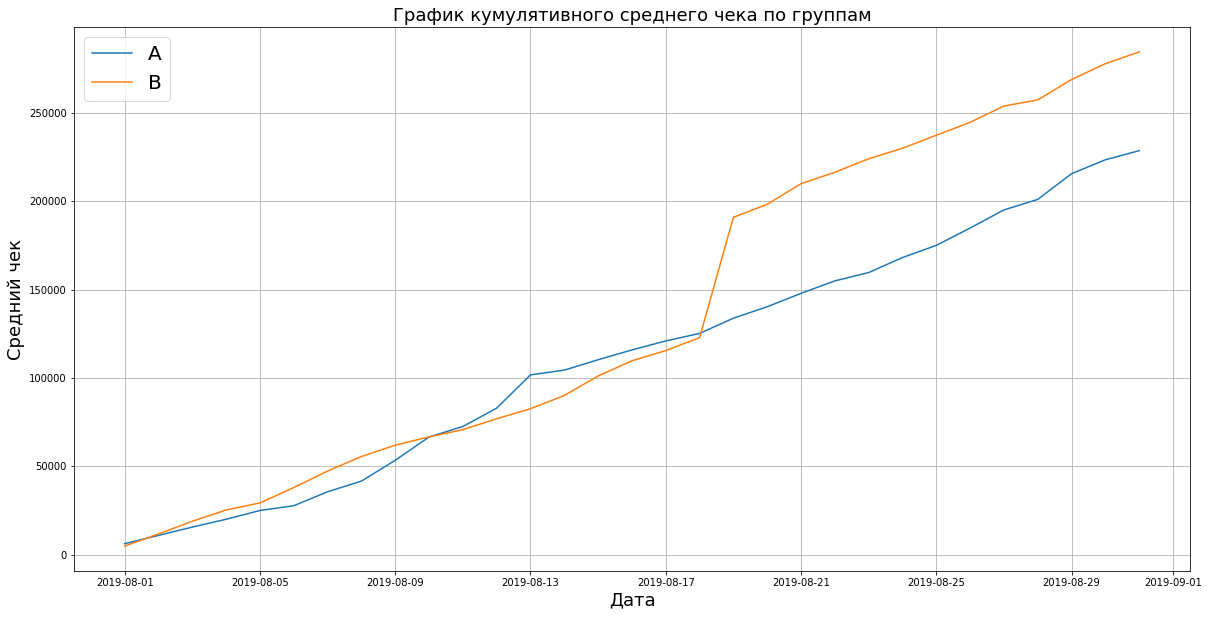

In [23]:
#Построим график кумулятивного среднего чека по группам
mean_check = orders_filt.groupby(['group','date'])['revenue'].mean().groupby(level=[0]).cumsum().to_frame().reset_index().round(1)
mean_check
mean_check_A = mean_check[mean_check['group']=='A']
mean_check_B = mean_check[mean_check['group']=='B']


plt.figure(figsize=(20, 10))
plt.title('График кумулятивного среднего чека по группам', fontsize=18)
plt.xlabel("Дата",fontsize=18)
plt.ylabel("Средний чек",fontsize=18)
# Строим график выручки группы А
plt.plot(mean_check_A['date'], mean_check_A['revenue'], label='A')
# Строим график выручки группы B
plt.plot(mean_check_B ['date'], mean_check_B ['revenue'], label='B')
plt.legend(('A', 'B'),fontsize=20)
plt.grid()
plt.show()

Значение среднего чека продолжает колебаться, делать выводы по такому графику еще рано.

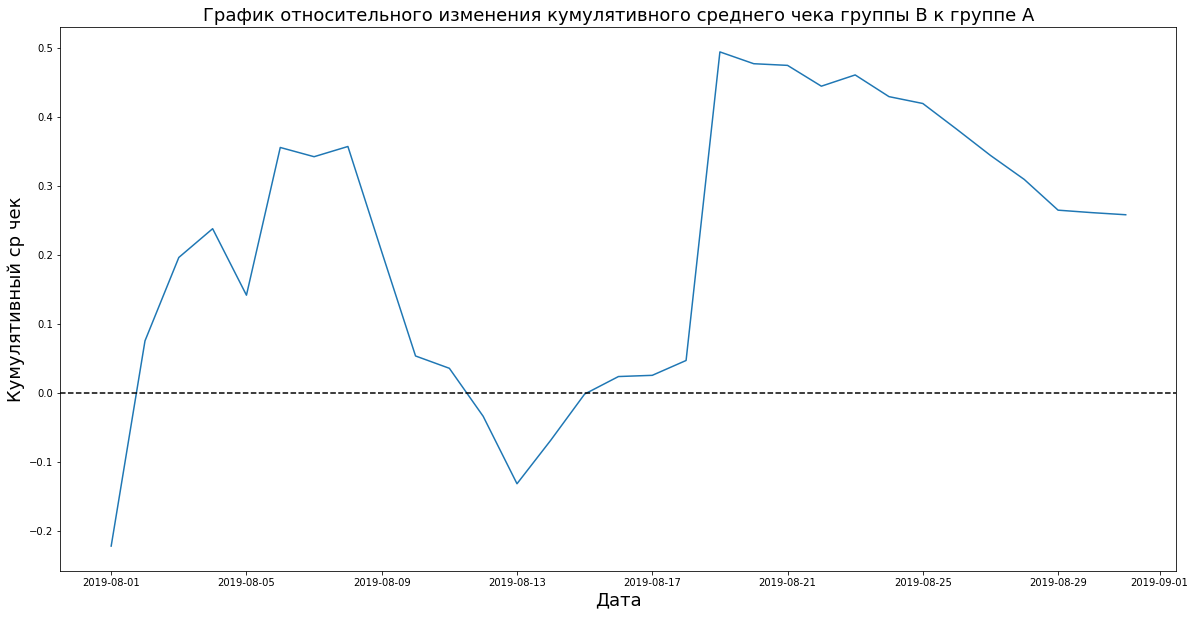

In [38]:
#Построим график относительного изменения кумулятивного среднего чека группы B к группе A
# собираем данные в одном датафрейме
plt.figure(figsize=(20, 10))
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A', fontsize=18)

mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.xlabel('Дата', fontsize=18)
plt.ylabel('Кумулятивный ср чек', fontsize=18)
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

Значения тест менялись резко в несколько дат, видимо именно тогда были совершены аномальные заказы

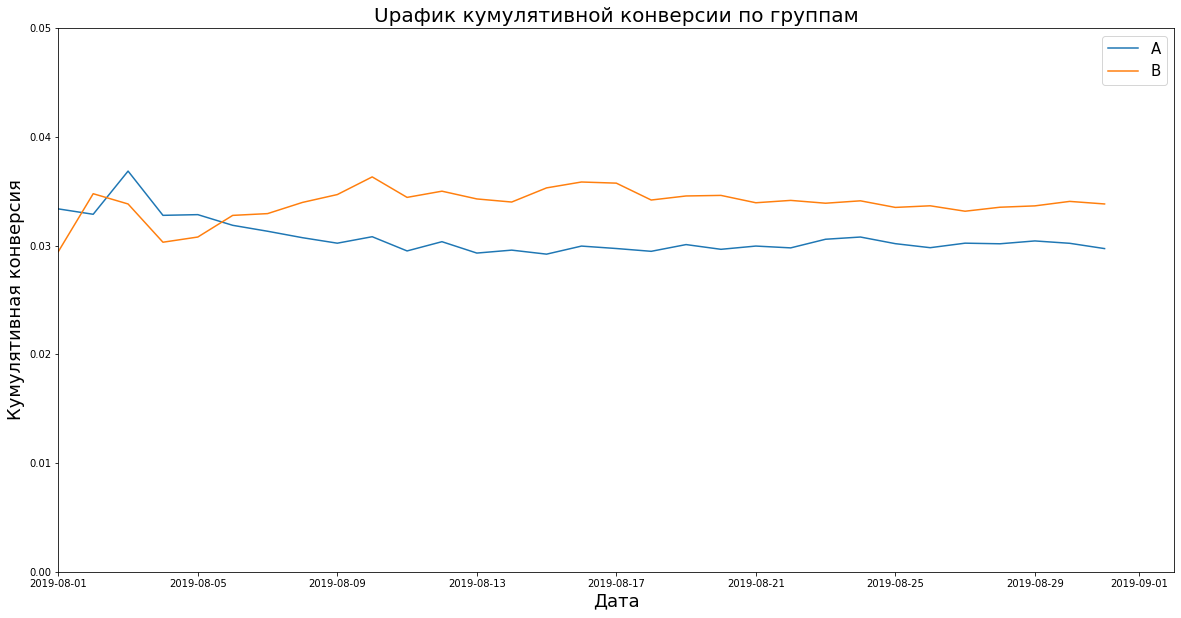

In [39]:
#Построим график кумулятивной конверсии по группам
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']
# строим графики
plt.figure(figsize=(20, 10))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 2), 0, 0.05])
plt.title('Uрафик кумулятивной конверсии по группам', fontsize=20)
plt.legend(('A', 'B'),fontsize=15)
plt.xlabel('Дата', fontsize=18)
plt.ylabel('Кумулятивная конверсия', fontsize=18)
plt.show()



В начале теста сегмент А имел большую конверсию, постепенно сегмент В выровнялся и зафиксировался больше значения сегмента В. Колебание с начале и в конце теста не слишком большое.

['2019-08-01', '2019-09-02', -0.5, 0.5]

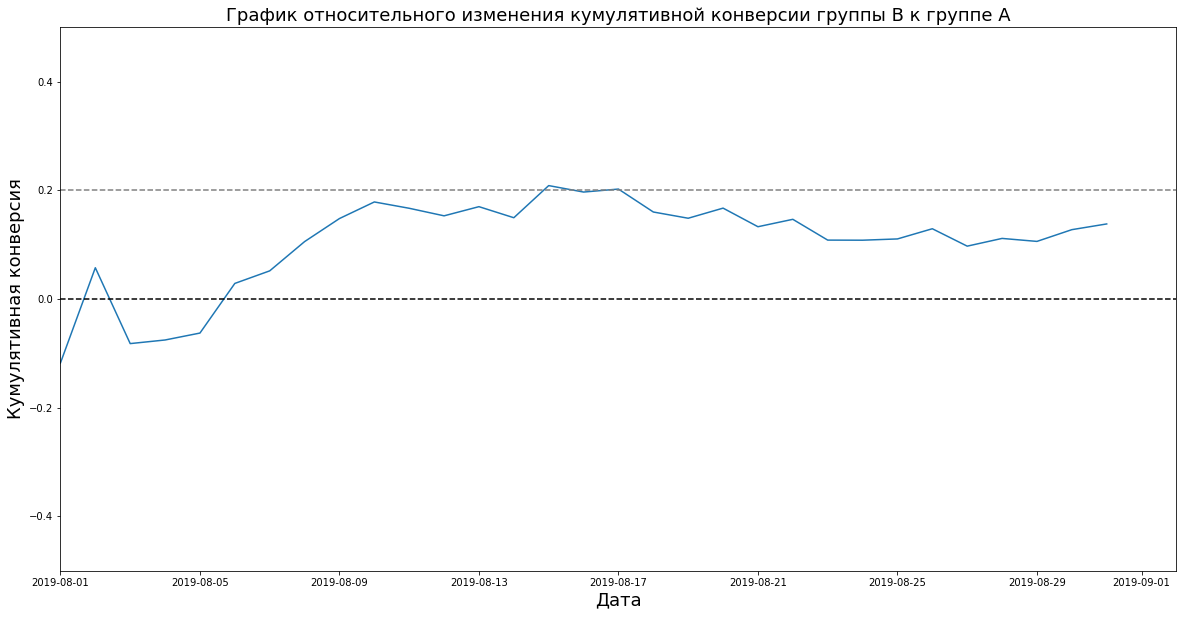

In [40]:
#Построим график относительного изменения кумулятивной конверсии группы B к группе A
plt.figure(figsize=(20, 10))
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A', fontsize=18)
cumulativeData['conversion'] = (
    cumulativeData['orders'] / cumulativeData['visitors']
)

cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")



plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.xlabel('Дата', fontsize=18)
plt.ylabel('Кумулятивная конверсия', fontsize=18)
plt.axis(["2019-08-01", '2019-09-02', -0.5, 0.5]) 

Почти с самого начала теста группа B лидирует по конверсии: есть прирост 20% относительно группы А.

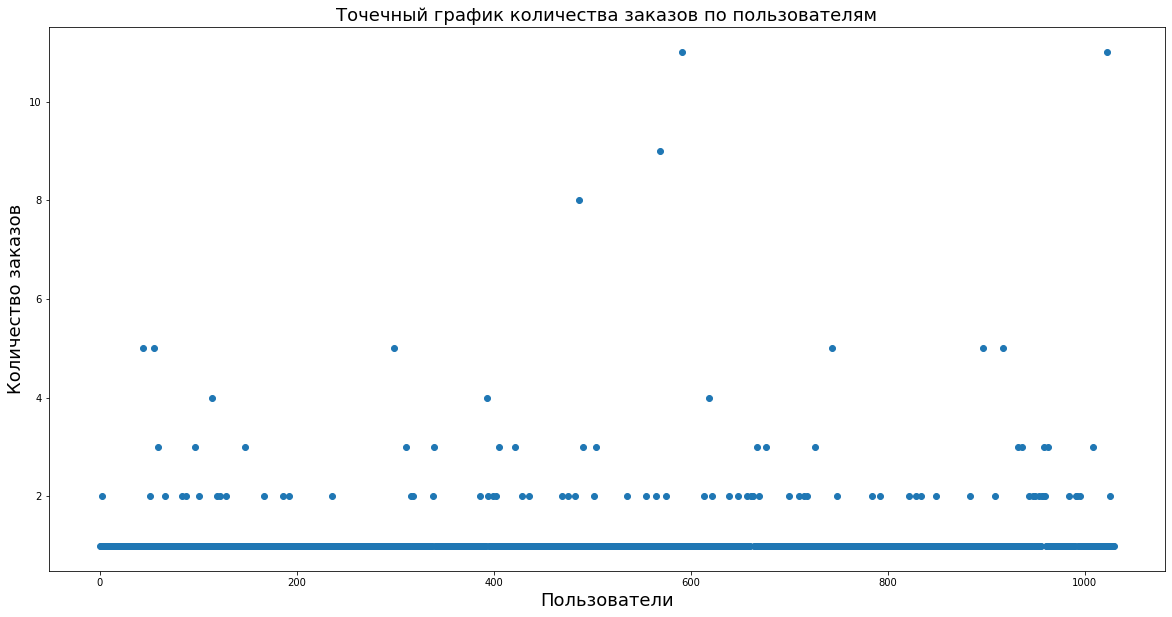

In [27]:
#Построим точечный график количества заказов по пользователям.
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsers.columns = ['visitorId', 'orders']

ordersByUsers.sort_values(by='orders', ascending=False)


# серия из чисел от 0 до количества наблюдений в ordersByUsers
plt.figure(figsize=(20, 10))
plt.title('Точечный график количества заказов по пользователям', fontsize=18)
plt.xlabel('Пользователи', fontsize=18)
plt.ylabel('Количество заказов', fontsize=18)
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values,ordersByUsers['orders'])
plt.show()






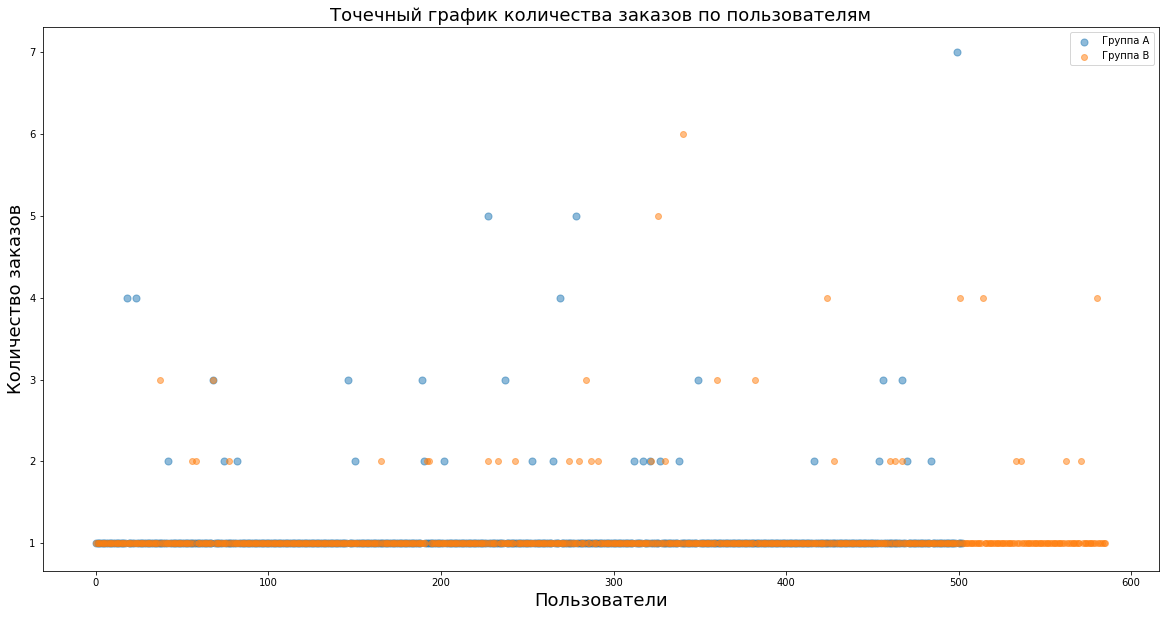

In [28]:
# Ячейка ревьюера: построим точечный график количества заказов на одного покупателя
# выделим данные для групп А и В:
ordersByUsers_a = orders.query('group == "A"').groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique})
ordersByUsers_b = orders.query('group == "B"').groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique})
x_values_a = pd.Series(range(0,len(ordersByUsers_a)))
x_values_b = pd.Series(range(0,len(ordersByUsers_b)))

plt.figure(figsize=(20, 10))
plt.title('Точечный график количества заказов по пользователям', fontsize=18)
plt.xlabel('Пользователи', fontsize=18)
plt.ylabel('Количество заказов', fontsize=18)
plt.scatter(x_values_a, ordersByUsers_a['transactionId'], label="Группа A", alpha=0.5, s = 50)
plt.scatter(x_values_b, ordersByUsers_b['transactionId'], label="Группа B", alpha=0.5)
plt.legend()
plt.show()

Спасибо за пример! Смотрю на код и понимаю что при попытках сделать самому мыслил в верном направлении но не дожал в конце

Пользователей заказавших более двух раз мало, они могут быть аномальными

In [29]:
#Посчитаем 95-й и 99-й перцентили количества заказов на пользователя
ordersByUsers.sort_values(by='orders', ascending=False).head(10)
np.percentile(ordersByUsers['orders'], [95, 99])


array([2., 4.])

99-му персентилю соотвествует значение 4, то есть больше 4 заказов сделали меньше 1% пользователей, 95-му персентилю соотвестует число 2, то есть больше 2 заказов совершили меньше 5% пользователей.

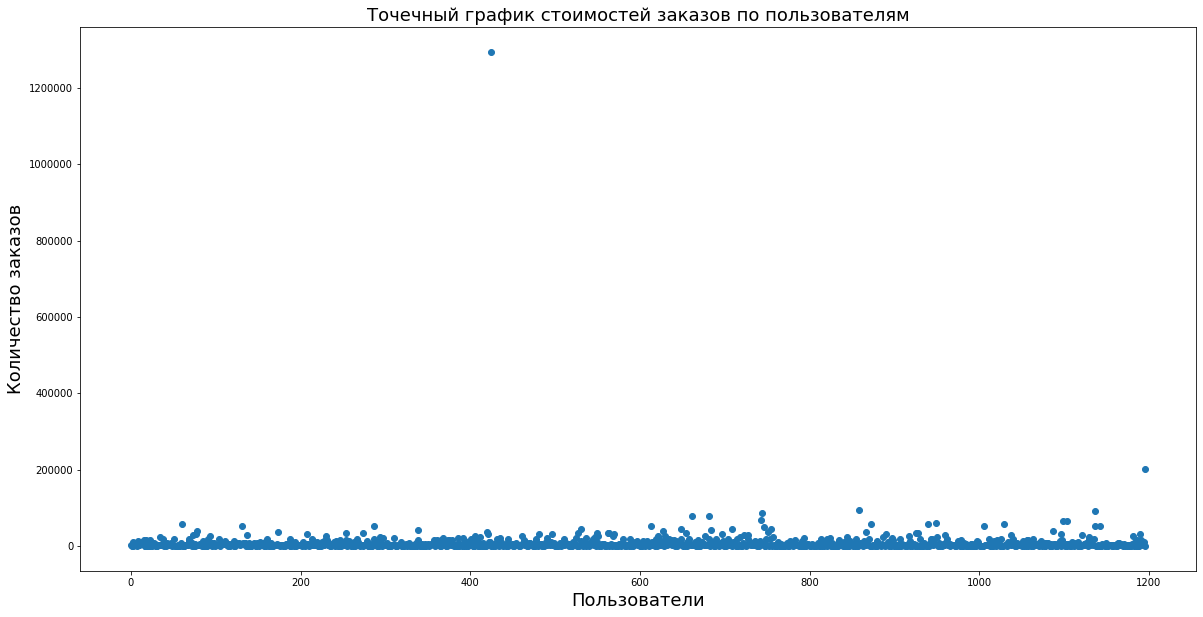

In [30]:

#Построим точечный график стоимостей заказов по пользователям.
plt.figure(figsize=(20, 10))
plt.title('Точечный график стоимостей заказов по пользователям', fontsize=18)
plt.xlabel('Пользователи', fontsize=18)
plt.ylabel('Количество заказов', fontsize=18)
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])

plt.show()

Есть немного дорогих заказов. По графику можно выбрать границу аномальных заказов между 20 000 и 120 000 рублей. Однако принято отсеивать от 1% до 5% наблюдений с крайними значениями.

In [31]:
#Посчитаем 95-й и 99-й перцентили стоимости заказов на пользователя.
orders.sort_values(by='revenue', ascending=False).head(10)
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

99-му персентилю соотвествует значение 58233, то есть стоимость заказа больше 58233 у 1% пользователей, 95-му персентилю соотвестует число 28000, то есть сумма заказа больше 28 тысяч у 5% пользователей

In [32]:

#соберем данные по заказам и визитам в одну таблицу. 
#для этого создадим несколько таблиц и затем объединим их
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']
visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']
ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5))



        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              24           148579              21   
1 2019-08-02              20            93822              24   
2 2019-08-03              24           112473              16   
3 2019-08-04              16            70825              17   
4 2019-08-05              25           124218              23   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0           101217                  24               148579   
1           165531                  44               242401   
2           114248                  68               354874   
3           108571                  84               425699   
4            92428                 109               549917   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  21               101217               719   
1                  45               266748               619   
2                  61               38

Для расчета р-value, я решил использовать напараметрический тест Уилкоксона-Манна-Уитни, так как у нас имеются выбросы, а сам тест работает с рангами, не учитывая сами значения. Так же сформирую нулевую и альтернативную гипотезы. Нулевая гипотеза говорит о том, что статистическая значимость не значительна и сделать вывод о различии нельзя, альтернативная гипотеза говорит о том, что статистическая значимость значитаельная и между выборками имеется статистическая значимость. Порогом статистической значимости установим alpha=.05

In [33]:
#Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']
 
ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']
 
pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')
 
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)
 
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)
 
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']
 
ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']
 
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
 
sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

alpha = .05
p_val_conv = stats.mannwhitneyu(sampleA, sampleB)[1].round(5)

print('P-value по конверсии до очистки данных: {}'.format(p_val_conv))
if (p_val_conv < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
print("Относительный показатель 'B' и 'A' = {0:.2f}".format(sampleB.mean()/sampleA.mean()-1)) 

P-value по конверсии до очистки данных: 0.0084
Отвергаем нулевую гипотезу
Относительный показатель 'B' и 'A' = 0.14


p-value значительно меньше 0.05 поэтому нулевую гепотизу отвергаем и  подтверждаем, что в среднем чеке между группами есть статистически значимая разница. Анализ сырых данных показывает что в конверсии  между группами есть статистически значемые различия. Относительный прирост группы В к группе А равен 14%


In [34]:
#Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным
print("alpha =",0.05)
print("Cтатистически значемых значений между группами = {0:.2f}".format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(ordersADaily)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(ordersBDaily)),
                )
            ]['revenue'],
        )[1]
    )
)
print("Относительное различие среднего чека между группами = {0:.2f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(ordersBDaily)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(ordersADaily)),
)
        ]['revenue'].mean()
        - 1
    )
) 




alpha = 0.05
Cтатистически значемых значений между группами = 0.36
Относительное различие среднего чека между группами = 0.26


Относительное различие среднего чека между группами = 26%, но поскольку p-value < alpha выборки не показывают статистически значимое различие, а именно  наблюдаемое нами отношение между группами, равно 26, было получено случайным образом.



In [35]:
#Подготовим очищенные данные
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']


usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId'],
    ],
    axis=0,
)

revenue_lim = np.percentile(orders['revenue'], 95)
usersWithExpensiveOrders = orders[orders['revenue'] > revenue_lim]['visitorId']
abnormalUsers = usersWithExpensiveOrders
abnormalUsers.head(5)

60     4256040402
73     2947100995
77      787824685
78     3288820196
131    2254586615
Name: visitorId, dtype: int64

In [36]:
#Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

alpha = .05
p_val_conv = stats.mannwhitneyu(sampleAFiltered,sampleBFiltered)[1]

print('P-value по конверсии после очистки данных: {0:.4f}'.format(p_val_conv))
if (p_val_conv < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
print("Относительный показатель 'B' и 'A' по очищеным данным= {0:.2f}".format(sampleBFiltered.mean() / sampleAFiltered.mean() - 1)) 

P-value по конверсии после очистки данных: 0.0094
Отвергаем нулевую гипотезу
Относительный показатель 'B' и 'A' по очищеным данным= 0.14


Сегмент В лучше сегмента А, статистическая значимость достигнута.

In [45]:
#Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.
print("alpha =",0.05)
print("Cтатистически значемых значений между группами = {0:.2f}".
    format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print("Относительное различие среднего чека между группами по очищенным данным = {0:.3f}".
    format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

alpha = 0.05
Cтатистически значемых значений между группами = 0.43
Относительное различие среднего чека между группами по очищенным данным = -0.013



По очищенным данным при сравнении среднего чека между группами мы получили значение p-value = 0.43, что больше, чем уровень стат. значимости - alpha = 0.05. В этом случае мы можем говорить о том, что между группами мы не наблюдаем статически значимых различий.

ВЫВОД:

   Остановим тест, зафиксируем отсутствие различий между группами.
 В течении всего анализа мы видим, что группа В является более успешной, конверсия из пользователя в покупателя у группы В выше чем у группы А, хотя конверсия по среднему чеку не имеет значимых различий между группами НО По очищенным данным при сравнении среднего чека между группами  мы не наблюдаем статически значимых различий.
 